<html>
    <body>
        <h1 style="color:red;"> Movie  Recommendation System</h1>


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('seaborn-whitegrid')

In [2]:
path = "u.data"
col_names = [ "user_id","movie_id","ratings" ]
ratings = pd.read_csv(path,sep="\t",names=col_names,usecols=[0,1,2])
ratings.head()

,user_id,movie_id,ratings
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


## EDA 

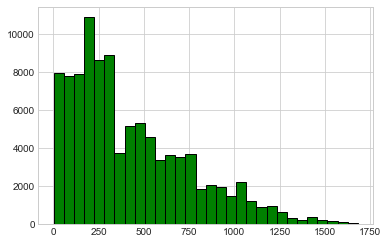

In [3]:
plt.hist(ratings['movie_id'],edgecolor='black',color='green',bins=30)
plt.show()

### most popular moives 

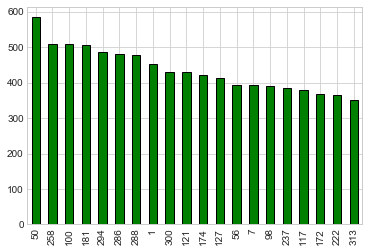

In [70]:
ratings['movie_id'].value_counts()[:20].plot(kind='bar',color='green',edgecolor='black')
plt.show()

In [5]:
ratings.shape

(100003, 3)

##### let's find popularity of movies 
    
    based how many pepole watched a movie and average rating of that movie  

In [6]:
ratings.head()

,user_id,movie_id,ratings
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [7]:
movie_property = ratings.groupby("movie_id").agg( 
    {'ratings':np.mean,'user_id':np.size} )
movie_property.columns  = [ 'mean',"size"]

In [8]:
movie_property.head()

,mean,size
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


#### top 5 popular moives 

In [9]:
movie_property.columns

Index(['mean', 'size'], dtype='object')

In [10]:
movie_property.sort_values('size',ascending=False)[:5]

,mean,size
movie_id,,
50,4.359589,584
258,3.803536,509
100,4.155512,508
181,4.007890,507
294,3.156701,485


$$ \text {normalizing coeff }x_i = \frac { (x_i - min(X)) } { max(X) - min(X) } $$

    X    popularity 
    10    ( 10 - 5 ) / ( 15 - 5 ) -->  0.5
    6     ( 6 - 5 ) / ( 15 - 5 )  -->  0.1
    15    ( 15 - 5 ) / ( 15 - 5 ) -->  1.0
    5      ( 5 - 5 ) / ( 15 - 5 ) --> 0 

    min(X)= 5
    max(X) = 15 


In [11]:
movie_property.head()

,mean,size
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [12]:
minimum = np.min(movie_property['size'])
maximum = np.max(movie_property['size'])
movie_property['popularity']  = movie_property['size'].apply(lambda x: (x-minimum)/(maximum-minimum))
print(" Minimum is ",minimum,"\n","Maximum is ", maximum)

 Minimum is  1 
 Maximum is  584


In [13]:
movie_property.head()

,mean,size,popularity
movie_id,,,
1,3.878319,452,0.773585
2,3.206107,131,0.222985
3,3.033333,90,0.152659
4,3.550239,209,0.356775
5,3.302326,86,0.145798


In [14]:
movie_property.iloc[814]

mean            3.232143
size          112.000000
popularity      0.190395
Name: 815, dtype: float64

In [15]:
columns = [  "movie_id","movie_title","release_date","video_release date",
    "IMDb_URL","unknown","Action","Adventure","Animation",
              "Childrens" , "Comedy","Crime", "Documentary","Drama","Fantasy",
              "Film-Noir_Horror", "Musical" , "Mystery", "Romance", "Sci-Fi",
              "Thriller","War","Western" ,"extra" ] 

In [16]:
movie_df = pd.read_csv("u.item",encoding='latin',sep="|",
                      names=columns)

In [17]:
movie_df.head()

,movie_id,movie_title,release_date,video_release date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
movie_name = movie_df['movie_title']

In [19]:
movie_name.index = movie_df['movie_id']

In [20]:
movie_name.head()

movie_id
1     Toy Story (1995)
2     GoldenEye (1995)
3    Four Rooms (1995)
4    Get Shorty (1995)
5       Copycat (1995)
Name: movie_title, dtype: object

In [21]:
movie_name[50]

'Star Wars (1977)'

In [22]:
movie_df.head()

,movie_id,movie_title,release_date,video_release date,IMDb_URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
movie_df = movie_df.pivot_table(index='movie_id')

In [24]:
movie_df.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra,unknown
movie_id,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [25]:
movie_df.columns

Index(['Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir_Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'extra',
       'unknown'],
      dtype='object')

In [26]:
movie_df.loc[50]

Action              1
Adventure           1
Animation           0
Childrens           0
Comedy              0
Crime               0
Documentary         0
Drama               0
Fantasy             0
Film-Noir_Horror    0
Musical             0
Mystery             0
Romance             0
Sci-Fi              1
Thriller            1
War                 0
Western             1
extra               0
unknown             0
Name: 50, dtype: int64

In [27]:
movie_property.head()

,mean,size,popularity
movie_id,,,
1,3.878319,452,0.773585
2,3.206107,131,0.222985
3,3.033333,90,0.152659
4,3.550239,209,0.356775
5,3.302326,86,0.145798


In [28]:
all_properties = movie_property.join(movie_df)

In [29]:
all_properties.head()

,mean,size,popularity,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra,unknown
movie_id,,,,,,,,,,,,,,,,,,,,,
1,3.878319,452,0.773585,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.206107,131,0.222985,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3.033333,90,0.152659,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.550239,209,0.356775,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.302326,86,0.145798,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
all_properties.drop("size",axis=1,inplace=True)

In [31]:
movie_name.head()

movie_id
1     Toy Story (1995)
2     GoldenEye (1995)
3    Four Rooms (1995)
4    Get Shorty (1995)
5       Copycat (1995)
Name: movie_title, dtype: object

In [32]:
all_properties.head()

,mean,popularity,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra,unknown
movie_id,,,,,,,,,,,,,,,,,,,,,
1,3.878319,0.773585,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.206107,0.222985,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3.033333,0.152659,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.550239,0.356775,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,3.302326,0.145798,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [33]:
all_properties.loc[133,'popularity']

0.2933104631217839

In [34]:
all_properties.loc[50,'popularity']

1.0

In [35]:
movie_name[133]

'Gone with the Wind (1939)'

In [36]:
# star wars 
# 

In [37]:
v1 = [ 1,2,3, ] 
v2 = [ 3,2,1 ]

    Euclidean Distance 
    Manhatten Distance
    Hamming Distance
    Minkowski Distance

$$ \text {Euclidean Distance (x1,y1) and (x2,y2)} = \sqrt { (x_1 - x_2)^2 + (y_1 - y2)^2}   $$

$$ Cosine Distance =\frac { \sum\limits_{i=1}^N x_i.y_i }  { \sqrt { \sum\limits_{i=1}^n x_i^2 }  \sqrt { \sum\limits_{i=1}^n y_i^2 } }$$

In [38]:
from scipy.spatial.distance import cosine

In [39]:
cosine([0,1,1,1,0,1],[0,0,1,1,0,1])

0.1339745962155613

In [40]:
all_properties.head(2)

,mean,popularity,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra,unknown
movie_id,,,,,,,,,,,,,,,,,,,,,
1,3.878319,0.773585,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.206107,0.222985,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [41]:
all_properties.loc[1,'Action':'unknown']

Action              0.0
Adventure           0.0
Animation           1.0
Childrens           1.0
Comedy              1.0
Crime               0.0
Documentary         0.0
Drama               0.0
Fantasy             0.0
Film-Noir_Horror    0.0
Musical             0.0
Mystery             0.0
Romance             0.0
Sci-Fi              0.0
Thriller            0.0
War                 0.0
Western             0.0
extra               0.0
unknown             0.0
Name: 1, dtype: float64

In [42]:
def calculateDistance(id1,id2):
    pop_dis = abs(all_properties.loc[id1,'popularity'] - all_properties.loc[id2,'popularity'])
    genre_dis = cosine(all_properties.loc[id1,'Action':'unknown'],
                      all_properties.loc[id2,'Action':'unknown']) 
    total_distance = pop_dis + genre_dis
    return total_distance

In [43]:
import operator
def getNeighbours(movie_id,k=5):
    distance = [ (mid,calculateDistance(movie_id,mid) )  for mid in all_properties.index if mid != movie_id ] 
    distance.sort(key=operator.itemgetter(1))
    #distance.sort(key=itemge)
    distance = distance[:k]
    return [ mid for mid,dis in distance ]    

In [44]:
all_properties.loc[50,'popularity']

1.0

In [45]:
def similar_movie(movie_id,k=5) : 
    ids = getNeighbours(movie_id,k)
    print(f"So {k} Nearest Neighbours of {movie_name[movie_id]}\n")
    print("Rating\t\tName")
    for mid in ids : 
        name = movie_name[mid]
        ratings = all_properties.loc[mid,'mean']
        print(f"{ratings:5.2}\t{name}")

In [46]:
similar_movie(50,10)

So 10 Nearest Neighbours of Star Wars (1977)

Rating		Name
  4.0	Return of the Jedi (1983)
  4.2	Empire Strikes Back, The (1980)
  3.4	Independence Day (ID4) (1996)
  3.7	Star Trek: First Contact (1996)
  4.3	Raiders of the Lost Ark (1981)
  3.7	English Patient, The (1996)
  3.2	Starship Troopers (1997)
  4.2	Princess Bride, The (1987)
  3.7	Jurassic Park (1993)
  3.9	Indiana Jones and the Last Crusade (1989)


In [47]:
getNeighbours(50)

[181, 172, 121, 222, 174]

# Start ML From Here

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scale = StandardScaler()
data = scale.fit_transform(all_properties[['mean','popularity']])
data[:5]

array([[ 1.02669491,  4.88441175],
       [ 0.16645338,  0.89023163],
       [-0.05464804,  0.38007155],
       [ 0.60684581,  1.86078007],
       [ 0.28958621,  0.33029984]])

In [50]:
y = all_properties.copy()

In [51]:
all_properties[['mean','popularity']] =  data

In [52]:
all_properties.head()

,mean,popularity,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra,unknown
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.026695,4.884412,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.166453,0.890232,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.054648,0.380072,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.606846,1.860780,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0.289586,0.330300,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [53]:
from sklearn.neighbors import NearestNeighbors

In [54]:
model = NearestNeighbors(n_neighbors=10)

In [55]:
model.fit(all_properties.iloc[:,2:])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [56]:
all_properties.iloc[50:52]

,mean,popularity,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir_Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,extra,unknown
movie_id,,,,,,,,,,,,,,,,,,,,,
51,0.487257,0.268085,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,0
52,0.887093,0.392514,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data = model.kneighbors(X=all_properties.iloc[50:52,2:],n_neighbors=10)

In [58]:
data[0].shape

(2, 10)

In [59]:
data[1].shape

(2, 10)

In [60]:
data[1]

array([[  50,  132, 1484,  548,  482,  285,  124,  156,   13,    9],
       [ 302,   29,   14,   18,    8, 1681,    5,  148,  304,   17]],
      dtype=int64)

In [61]:
print("Movie Name = ",movie_name.loc[50])  #['movie_title']
print("Nearest Neighbours : \n\t",end='')
print(*movie_name.loc[data[1][0]],sep="\n\t")

Movie Name =  Star Wars (1977)
Nearest Neighbours : 
	Star Wars (1977)
	Wizard of Oz, The (1939)
	Jerky Boys, The (1994)
	NeverEnding Story III, The (1994)
	Some Like It Hot (1959)
	Secrets & Lies (1996)
	Lone Star (1996)
	Reservoir Dogs (1992)
	Mighty Aphrodite (1995)
	Dead Man Walking (1995)


In [62]:
movie_name[movie_name == 'Star Wars (1977)']

movie_id
50    Star Wars (1977)
Name: movie_title, dtype: object

In [63]:
scale= StandardScaler()

In [64]:
data = scale.fit_transform(all_properties)

C:\Users\RAhul\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RAhul\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [65]:
model = NearestNeighbors() 

In [66]:
model.fit(data)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [67]:
data = model.kneighbors(X=all_properties.iloc[50:52,:],n_neighbors=10)

In [68]:
print("Movie Name = ",movie_name.loc[50])
print("Nearest Neighbours : \n\t",end='')
print(*movie_name.loc[data[1][0]],sep="\n\t")

Movie Name =  Star Wars (1977)
Nearest Neighbours : 
	High Noon (1952)
	Boys on the Side (1995)
	Junior (1994)
	Antonia's Line (1995)
	Manchurian Candidate, The (1962)
	Leaving Las Vegas (1995)
	M*A*S*H (1970)
	Basic Instinct (1992)
	Once Upon a Time in America (1984)
	Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)
